In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [30]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing import image
import numpy as np

In [31]:
# Reading data from the floders(loading data)
glioma= r"/kaggle/input/brain-tumor-mri-dataset/Training/glioma"
meningioma  = r"/kaggle/input/brain-tumor-mri-dataset/Training/meningioma"
notumor = r"/kaggle/input/brain-tumor-mri-dataset/Training/notumor"
pituitary = r"/kaggle/input/brain-tumor-mri-dataset/Training/pituitary"
path = [glioma,meningioma,notumor,pituitary]
images_labels = [0,1,2,3]

In [32]:
def load_and_preprocess_images(image_paths, input_shape):
    images = []
    for path in image_paths:
        img = image.load_img(path, target_size=(input_shape[0], input_shape[1]))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        images.append(img)
    return np.vstack(images)

In [33]:
# Enhance the image with histogram equalization method
images_path = []
class_labels = []
for i , p in enumerate(path):
    image_names = os.listdir(p)
    for file_name in image_names:
        image = os.path.join(p,file_name)
        images_path.append(image)
        class_labels.append(images_labels[i])

In [34]:
#converting data into dataframe
data = pd.DataFrame({'images':images_path,'class_labels':class_labels})

In [35]:
data

,images,class_labels
0,/kaggle/input/brain-tumor-mri-dataset/Training...,0
1,/kaggle/input/brain-tumor-mri-dataset/Training...,0
2,/kaggle/input/brain-tumor-mri-dataset/Training...,0
3,/kaggle/input/brain-tumor-mri-dataset/Training...,0
4,/kaggle/input/brain-tumor-mri-dataset/Training...,0
...,...,...
5707,/kaggle/input/brain-tumor-mri-dataset/Training...,3
5708,/kaggle/input/brain-tumor-mri-dataset/Training...,3
5709,/kaggle/input/brain-tumor-mri-dataset/Training...,3
5710,/kaggle/input/brain-tumor-mri-dataset/Training...,3


In [36]:
X = data['images']
y = data['class_labels']

In [37]:
from tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(data['class_labels']))
y_categorical = to_categorical(data["class_labels"], num_classes=num_classes)

In [38]:
from tensorflow.keras.preprocessing import image

input_shape = (227, 227, 3) 
image_paths = images_path
X = load_and_preprocess_images(image_paths, input_shape)

X_reshaped = X.reshape((-1,) + input_shape)
X_train, X_test ,y_train,y_test = train_test_split(X_reshaped, y_categorical,test_size=0.2, random_state=42)  


In [39]:
# Data augmentation to increase the size of the dataset
datagen = ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)


train_generator = datagen.flow(X_train, y_train, batch_size=32)
test_generator = datagen.flow(X_test, y_test, batch_size=32)


In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (227, 227, 3)
num_classes = 4
alex_net = keras.Sequential(
    [
        layers.Conv2D(96, kernel_size=11, strides=4, padding="same", activation="relu", input_shape=input_shape),
        layers.MaxPooling2D(pool_size=3, strides=2),
        layers.Conv2D(256, kernel_size=5, padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=3, strides=2),
        layers.Conv2D(384, kernel_size=3, padding="same", activation="relu"),
        layers.Conv2D(384, kernel_size=3, padding="same", activation="relu"),
        layers.Conv2D(256, kernel_size=3, padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=3, strides=2),
        layers.Flatten(),
        layers.Dense(4096, activation="relu"),
        layers.Dense(4096, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

alex_net.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 57, 57, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │        16,388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,297,732 (222.39 MB)

 Trainable params: 58,297,732 (222.39 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
import tensorflow as tf

In [42]:
alex_net.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy')>0.97:
            self.model.stop_training=True
callback = myCallback()

In [46]:
# Train the model
history = alex_net.fit(train_generator, 
                    steps_per_epoch=len(X_train) // 32, 
                    epochs=100, 
                    validation_data=test_generator,
                    validation_steps=len(X_test) // 32,
                    callbacks=[callback])

Epoch 1/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 58s 391ms/step - accuracy: 0.9511 - loss: 0.1406 - val_accuracy: 0.9616 - val_loss: 0.1298
Epoch 2/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.1148 - val_accuracy: 0.9130 - val_loss: 0.1206
Epoch 3/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 57s 384ms/step - accuracy: 0.9634 - loss: 0.1143 - val_accuracy: 0.9536 - val_loss: 0.1337
Epoch 4/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.1032 - val_accuracy: 1.0000 - val_loss: 0.0456
Epoch 5/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 58s 389ms/step - accuracy: 0.9694 - loss: 0.0943 - val_accuracy: 0.9491 - val_loss: 0.1356


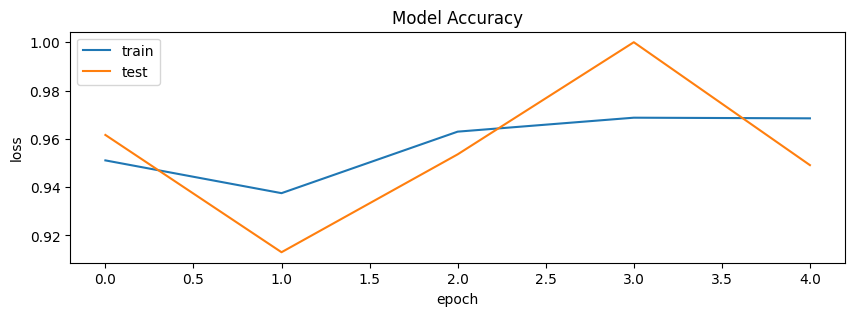

In [47]:
plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

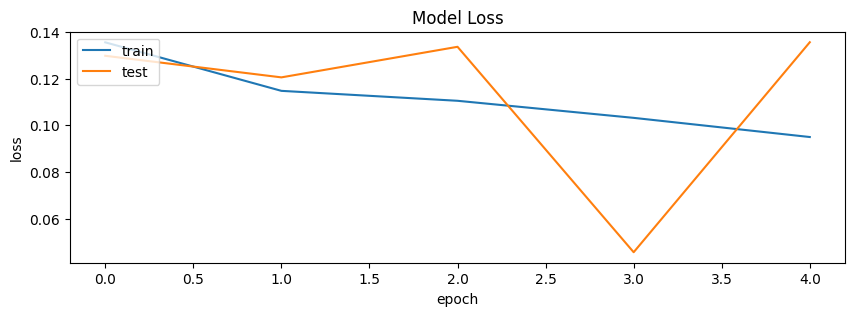

In [48]:
plt.figure(figsize=(10,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [49]:
alex_net.save("alex_net.h5")

In [50]:
from tensorflow.keras.models import load_model
alex_net = load_model("alex_net.h5")

In [51]:
# Evaluate the model
test_loss, test_acc = alex_net.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

 1/36 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9062 - loss: 0.2742

W0000 00:00:1714198718.995925     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 322ms/step - accuracy: 0.9521 - loss: 0.1503
Test accuracy: 0.9562554955482483


In [52]:
y_t = []
for i in range(len(y_train)):
    y_t.append(np.argmax(y_train[i]))

In [56]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Extract features from the last layer before the dense layers in AlexNet
feature_layer_index = -2  
feature_model = Sequential(alex_net.layers[:feature_layer_index+1])

# Extract features from the training data
X_train_features = feature_model.predict(X_train)

# Use SelectKBest with mutual information for feature ranking
num_features_to_select = 100
selector = SelectKBest(mutual_info_classif, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train_features, y_t)

143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step


In [57]:
print(f"The Selected features :{X_train_selected}")

The Selected features :[[38.13799   20.327272  46.324978  ... 36.006973  23.082249  27.436544 ]
 [18.987074   6.2344227 25.682243  ...  6.924624  10.1460285  4.0934644]
 [40.08695   24.365845  31.068747  ... 31.484104  22.419611  30.55839  ]
 ...
 [ 6.367484   0.        11.0537405 ...  5.1394787  2.555468   0.       ]
 [ 5.95295    0.        35.955753  ...  0.9629727  9.447636   9.466256 ]
 [52.324192  37.549377  46.32192   ... 39.187935  33.275387  38.26244  ]]


In [59]:
X_train_selected.shape

(4569, 100)

In [69]:
import pandas as pd

data = pd.DataFrame(X_train_selected)

In [71]:
data.to_csv('data.csv', index=False)

In [81]:
import tensorflow as tf

# Define the architecture of the deep neural network
def create_deep_nn(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(100,)),  # Input layer: Flatten the input
        tf.keras.layers.Dense(128, activation='relu'),     # Hidden layer 1 with 128 neurons and ReLU activation
        tf.keras.layers.Dense(64, activation='relu'),      # Hidden layer 2 with 64 neurons and ReLU activation
        tf.keras.layers.Dense(32, activation='relu'),      # Hidden layer 3 with 32 neurons and ReLU activation
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

num_classes = 4     

model = create_deep_nn(input_shape, num_classes)
model.summary()  # Print the summary of the model


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,396 (91.39 KB)

 Trainable params: 23,396 (91.39 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
print("X_train_selected shape:", X_train_selected.shape)
import numpy as np
y_t = np.array(y_t)
print("y_t_array shape:", y_t.shape)


X_train_selected shape: (4569, 100)
y_t_array shape: (4569,)


In [83]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [84]:
import tensorflow as tf
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy')>=0.99 and logs.get('val_accuracy')>=0.97:
            self.model.stop_training=True
callback = Callback()

In [85]:
# Train the model
classification = model.fit(X_train_selected, y_t, epochs=1000, batch_size=32, validation_split=0.2,callbacks=[callback])

Epoch 1/1000
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6222 - loss: 5.8540 - val_accuracy: 0.8479 - val_loss: 0.7611
Epoch 2/1000
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.6361 - val_accuracy: 0.8271 - val_loss: 1.0001
Epoch 3/1000
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.6988 - val_accuracy: 0.9190 - val_loss: 0.2208
Epoch 4/1000
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9128 - loss: 0.3102 - val_accuracy: 0.9070 - val_loss: 0.2833
Epoch 5/1000
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8756 - loss: 0.5961 - val_accuracy: 0.9179 - val_loss: 0.2758
Epoch 6/1000
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9323 - loss: 0.2462 - val_accuracy: 0.8195 - val_loss: 0.8556
Epoch 7/1000
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8711 - loss: 0.7334 - val_accuracy: 0.9190 - val_loss: 0.2890
Epoch 8/1000
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9286 - loss: 0.2584 -

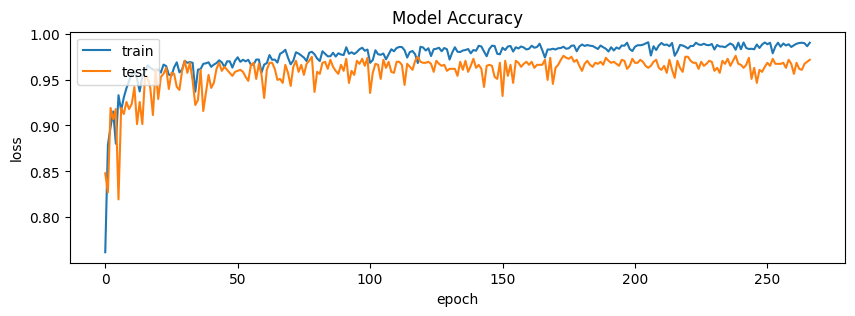

In [86]:
plt.figure(figsize=(10,3))
plt.plot(classification.history['accuracy'])
plt.plot(classification.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [87]:
model.save('classification.h5')

In [88]:
model = load_model('classification.h5')

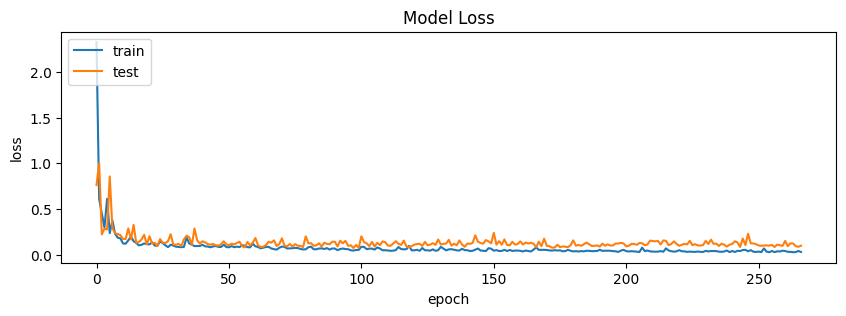

In [89]:
plt.figure(figsize=(10,3))
plt.plot(classification.history['loss'])
plt.plot(classification.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [90]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities for test set
y_pred_prob = model.predict(X_train_selected)

# Convert probabilities to binary predictions
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_t, y_pred)

# Print classification report
class_report = classification_report(y_t, y_pred)
print("Classification Report:")
print(class_report)

143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1033
           1       0.97      0.98      0.98      1074
           2       1.00      1.00      1.00      1304
           3       1.00      1.00      1.00      1158

    accuracy                           0.99      4569
   macro avg       0.99      0.99      0.99      4569
weighted avg       0.99      0.99      0.99      4569



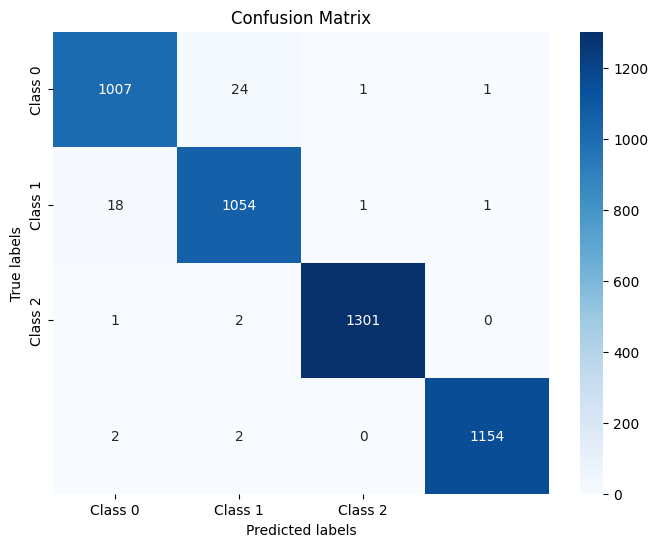

In [91]:
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

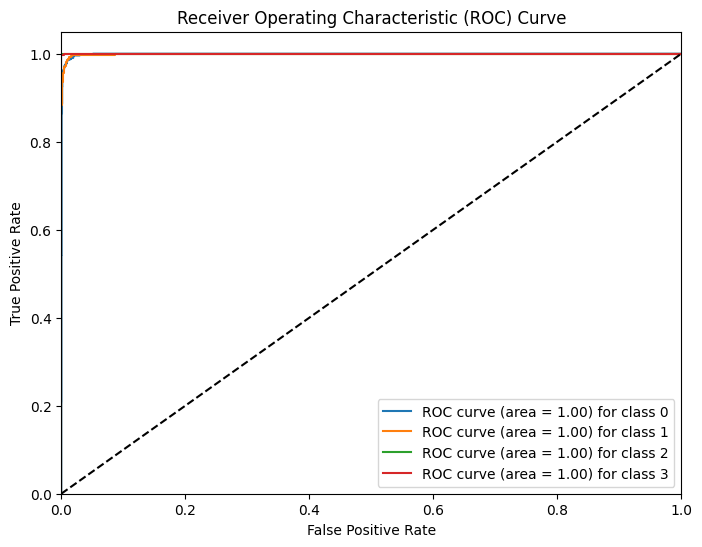

In [92]:
from sklearn.metrics import roc_curve, auc


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve((y_t == i).astype(int), y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [93]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate additional metrics
precision = precision_score(y_t, y_pred, average=None)
recall = recall_score(y_t, y_pred, average=None)
f1 = f1_score(y_t, y_pred, average=None)
accuracy = accuracy_score(y_t, y_pred)

# Print additional metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision: [0.97957198 0.974122   0.99846508 0.9982699 ]
Recall: [0.97483059 0.98137803 0.99769939 0.99654577]
F1 Score: [0.97719554 0.97773655 0.99808209 0.99740709]
Accuracy: 0.9884000875465091


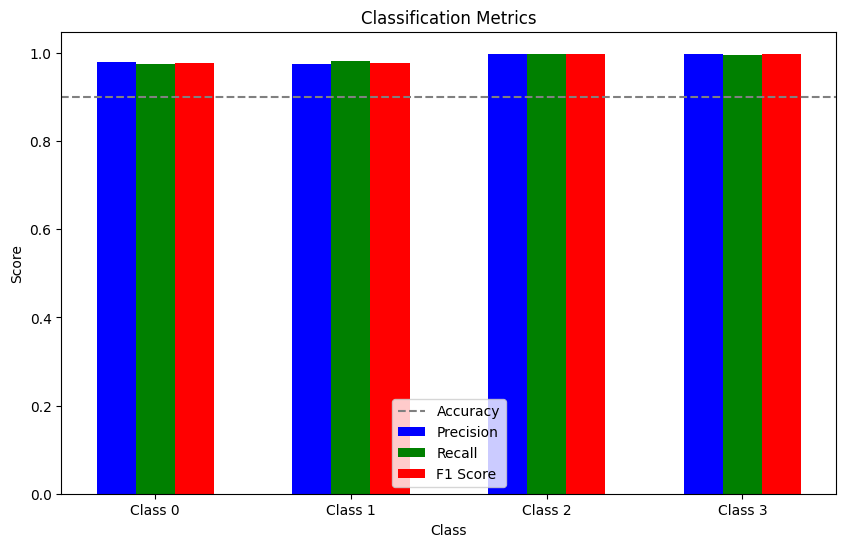

In [94]:
# Number of classes
num_classes = len(precision)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting precision
bar_width = 0.2
class_index = np.arange(num_classes)
plt.bar(class_index - bar_width, precision, width=bar_width, color='b', label='Precision')

# Plotting recall
plt.bar(class_index, recall, width=bar_width, color='g', label='Recall')

# Plotting F1 score
plt.bar(class_index + bar_width, f1, width=bar_width, color='r', label='F1 Score')

# Plotting accuracy as a horizontal line
plt.axhline(y=0.9, color='gray', linestyle='--', label='Accuracy')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Metrics')
plt.xticks(class_index, labels=['Class {}'.format(i) for i in range(num_classes)])
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


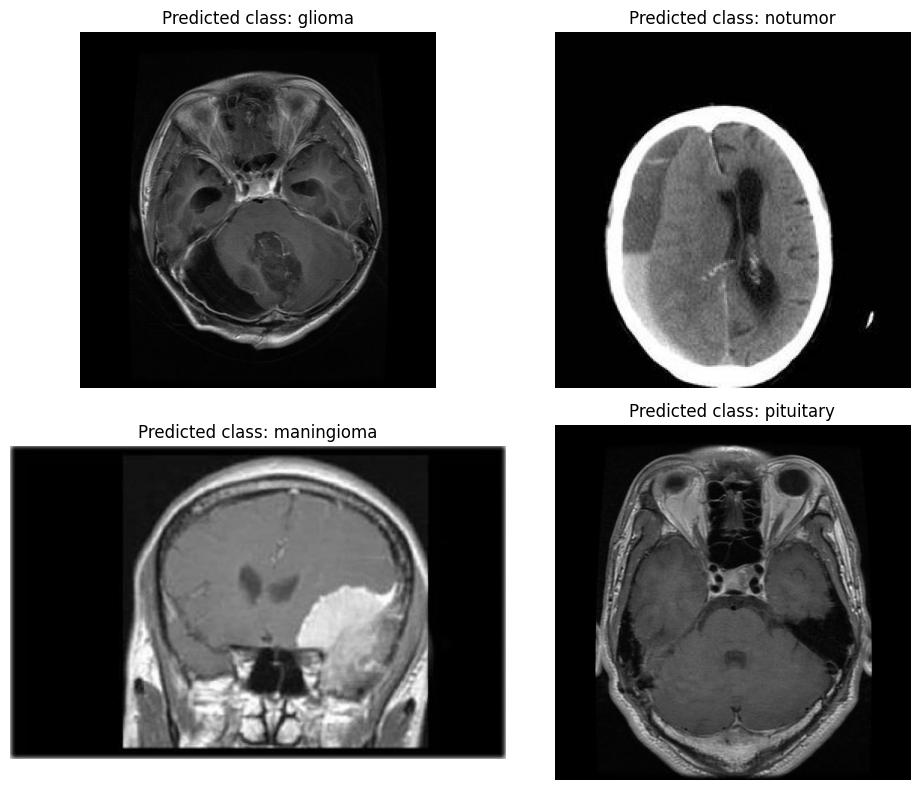

In [100]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Function to load and preprocess images
def load_and_preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to make prediction for a given image
def predict_image(image_path, model, feature_model, selector, cls):
    img_array = load_and_preprocess_image(image_path, input_shape)
    features = feature_model.predict(img_array)
    selected_features = selector.transform(features)
    predicted_classes = model.predict(selected_features)
    predicted_class_index = np.argmax(predicted_classes)
    return cls[predicted_class_index]

input_shape = (227, 227)  
cls = ['glioma','maningioma','notumor','pituitary']

# Paths for the images
image_paths = [
    "/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-glTr_0000.jpg",
    "/kaggle/input/brain-tumor-mri-dataset/Testing/notumor/Te-noTr_0000.jpg",
    "/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/Te-meTr_0000.jpg",
    "/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-piTr_0000.jpg"
]

# Make predictions for each image
plt.figure(figsize=(10, 8))
for i, image_path in enumerate(image_paths):
    predicted_class = predict_image(image_path, model, feature_model, selector, cls)
    plt.subplot(2, 2, i + 1)
    plt.imshow(image.load_img(image_path))
    plt.title(f"Predicted class: {predicted_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()
